In [487]:
import numpy as np
import cv2
from matplotlib import pyplot as plt


In [488]:
img = cv2.imread('water_coins.jpeg')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)


(Text(0.5, 1.0, 'Binary image'), ([], []), ([], []))

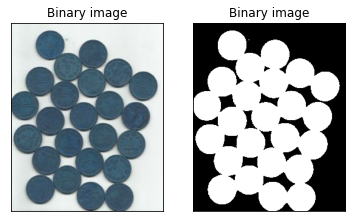

In [489]:
plt.subplot(121),plt.imshow(img,'gray')
plt.title("Binary image"), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(thresh,'gray')
plt.title("Binary image"), plt.xticks([]), plt.yticks([])

In [490]:
# noise removal
kernel = np.ones((3,3),np.uint8)
opening = cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel, iterations = 2)


(Text(0.5, 1.0, 'Result after noise_removal'), ([], []), ([], []))

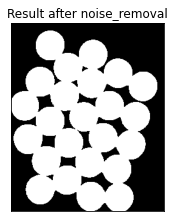

In [491]:
plt.subplot(121),plt.imshow(opening,'gray')
plt.title("Result after noise_removal"), plt.xticks([]), plt.yticks([])

In [492]:
# sure background area
sure_bg = cv2.dilate(opening,kernel,iterations=3)


(Text(0.5, 1.0, 'sure_background after_dilation'), ([], []), ([], []))

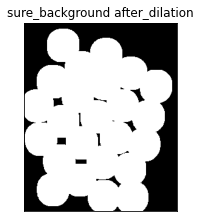

In [493]:
plt.subplot(121),plt.imshow(sure_bg,'gray')
plt.title("sure_background after_dilation"), plt.xticks([]), plt.yticks([])

In [494]:
# Finding sure foreground area
dist_transform = cv2.distanceTransform(opening,cv2.DIST_L2,5)
ret, sure_fg = cv2.threshold(dist_transform,0.7*dist_transform.max(),255,0)


(Text(0.5, 1.0, 'sure foreground'), ([], []), ([], []))

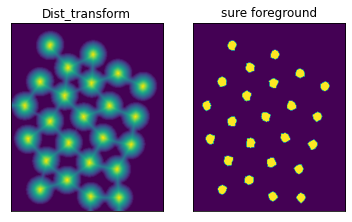

In [495]:
plt.subplot(121),plt.imshow(dist_transform)
plt.title("Dist_transform"), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(sure_fg)
plt.title("sure foreground"), plt.xticks([]), plt.yticks([])

In [496]:
# Finding unknown region
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg,sure_fg)


(Text(0.5, 1.0, 'Unknown'), ([], []), ([], []))

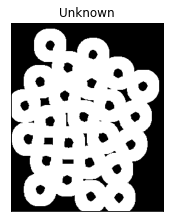

In [497]:
plt.subplot(121),plt.imshow(unknown,'gray')
plt.title("Unknown"), plt.xticks([]), plt.yticks([])

In [498]:
# Marker labelling
ret, markers = cv2.connectedComponents(sure_fg)
markers2=markers

(Text(0.5, 1.0, 'Result from connectedcomponents'), ([], []), ([], []))

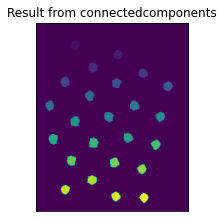

In [499]:
plt.subplot(121),plt.imshow(markers)
plt.title("Result from connectedcomponents"), plt.xticks([]), plt.yticks([])

In [500]:
# Add one to all labels so that sure background is not 0, but 1
markers = markers+1

# Now, mark the region of unknown with zero
markers[unknown==255] = 0


(Text(0.5, 1.0, 'markers'), ([], []), ([], []))

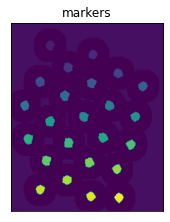

In [501]:
plt.subplot(121),plt.imshow(markers)
plt.title("markers"), plt.xticks([]), plt.yticks([])

In [502]:
markers = cv2.watershed(img,markers)
img[markers == -1] = [255,0,0]
img[markers2>0]=[255,255,0]



(Text(0.5, 1.0, 'Result from Watershed'), ([], []), ([], []))

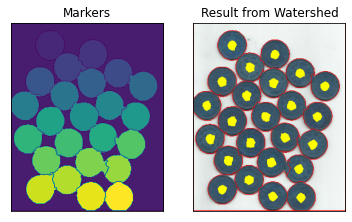

In [503]:
plt.subplot(121),plt.imshow(markers)
plt.title("Markers"), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(img)
plt.title("Result from Watershed"), plt.xticks([]), plt.yticks([])